In [0]:
import numpy as np

In [36]:
sample_a = -1+2*np.matrix([[0, 1, 0],
                           [1, 0, 1],
                           [1, 1, 1],
                           [1, 0, 1],
                           [1, 0, 1]])

sample_b = -1+2*np.matrix([[1, 1, 0],
                           [1, 0, 1],
                           [1, 1, 0],
                           [1, 0, 1],
                           [1, 1, 0]])

sample_c = -1+2*np.matrix([[0, 1, 1],
                           [1, 0, 0],
                           [1, 0, 0],
                           [1, 0, 0],
                           [0, 1, 1]])
sample = np.zeros((3, 15))
sample[0] = sample_a.flatten()
sample[1] = sample_b.flatten()
sample[2] = sample_c.flatten()
sample.shape

(3, 15)

In [37]:
target = np.zeros((3, 3))
target[0] = np.matrix([[ 1,  1, -1]])
target[1] = np.matrix([[ 1, -1,  1]])
target[2] = np.matrix([[-1,  1,  1]])
target.shape

(3, 3)

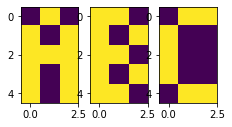

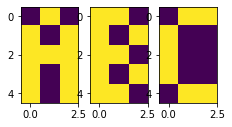

In [38]:
import matplotlib.pyplot as plt
for s in range(0,3):
    plt.subplot2grid((2,5),(int(s/5),s%5))
    plt.imshow(sample[s,:].reshape(5,3))
#plt.show()

In [51]:
#Hamming Distance

nonzeros_a_b = np.count_nonzero(sample[0] != sample[1])
print("Hamming distance between A and B is", nonzeros_a_b,'.')

nonzeros_a_c = np.count_nonzero(sample[0] != sample[2])
print("Hamming distance between A and c is", nonzeros_a_c,'.')

nonzeros_c_b = np.count_nonzero(sample[2] != sample[1])
print("Hamming distance between B and C is", nonzeros_c_b,'.')

Hamming distance between A and B is 4 .
Hamming distance between A and c is 7 .
Hamming distance between B and C is 7 .


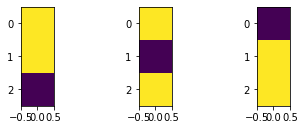

In [40]:
import matplotlib.pyplot as plt
for ss in range(0,3):
    plt.subplot2grid((2,3),(int(ss/3),ss%3))
    plt.imshow(target[ss,:].reshape(3,1))
plt.show()

In [41]:
w = np.matmul(sample.T, target).reshape(3,15)
w

array([[ 1., -3.,  1.,  1.,  1.,  1., -3.,  1.,  1.,  1.,  1.,  1., -1.,
        -1., -1.],
       [ 3., -1., -1.,  1.,  1.,  1.,  3., -1., -1.,  1.,  1., -3.,  1.,
         1.,  1.],
       [-1., -1., -1.,  3., -1., -1.,  3., -1., -1., -1., -1.,  3., -1.,
         3., -1.]])

In [0]:
def af(x,y):
  if x > 0:
    return 1
  elif x < 0:
    return -1
  else:
    return y

In [0]:
y = np.array(target)
y_in = np.zeros((3,3))

In [0]:
s = np.array(sample)
s_in = np.zeros((3,15))

In [0]:
w = w.reshape(15,3)

In [0]:
for i in range (0,3):
  flag = True
  while (flag):
    for j in range (0,3):
      sum_ = 0
      for k in range (0,15):
        sum_ = sum_ + sample[i,k] * w[k,j]
      y_in[i,j] = sum_
      y[i,j] = af(y_in[i, j], y[i,j])
      if target[i,j] == y[i,j]:
        flag = False

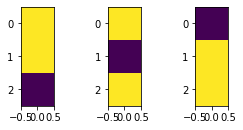

In [47]:
for ss in range(0,3):
    plt.subplot2grid((2,4),(int(ss/4),ss%4))
    plt.imshow(y[ss,:].reshape(3,1))
plt.show()

In [0]:
for ii in range (0,3):
  flag2 = True
  while (flag2):
    for jj in range (0,15):
      sum_s = 0
      for kk in range (0,3):
        sum_s = sum_s +  w[jj,kk] * target[ii,kk] 
      s_in[ii,jj] = sum_s
      s[ii,jj] = af(s_in[ii, jj], s[ii,jj])
      if sample[ii,jj] == s[ii,jj]:
        flag2 = False

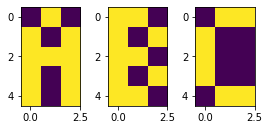

In [49]:
for ss in range(0,3):
    plt.subplot2grid((2,4),(int(ss/4),ss%4))
    plt.imshow(s[ss,:].reshape(5,3))
plt.show()